# “Predicting movie success”

## 1. Background

Every year thousands of movies are made and a lot of them are made in America. America has been the leader in movie making and revenue since the beginning of the 20th century. Hollywood, the home of the movie business, is a multi-billion industry. Movies alone could make over a billion dollars. This is where most of the movie industry strive to work and make movies. There is not only a business for the movie industry but also advertisement for example. However, there is just a few movies that make it big-time, why is that?(Hsu, Ping-Yu, et.al. 2014)

IMDB is one of the largest resources available to find and research movies. It has most of the movies ever made in its database. IMDB has the same idea as Wikipedia where most of the data added in the database comes from its users. But it has a well-structured database which makes it great for data mining. They have a rating based system from 1-10 (user ratings) too decide which movie is the best one. There is also the box office that decides which movie that made the most money.(IMDb, 2018)

Given that the movie business is massive and thousands of movies are made each year and the top 5 movies makes about 14% of the box office, we wondered why?(Hsu, Ping-Yu, et.al. 2014) Does a big budget matter if you want to succeed, is it the genre, maybe the actors/actresses, or is it a combination of multiple factors? What would a company have to do to get in to this massive business that is called Hollywood? In this paper we will try to predict ,with the help of IMDBs database and data mining tools, if it is possible to see a pattern in why a movie succeeds or fails.

The goal of the project, that’s to say the problem it is meant to address, will be written about in greater detail in the following section, the problem description. In the section data collection, the data used and the processing of said data will be described. The data analysis section handles the modeling method chosen and the reasons behind this choice. The section evaluation of results contains a documentation of the results. The Schedule and description of project plan is given afterwards. Lastly comes the section ethical aspect that need to be considered,  in which ethical concerns within the projects are discussed.

## 2. Problem description

The biggest concern for anyone making a movie is whether or not it will earn enough money, it can take years in production and cost millions, to justify this investment it is crucial to somehow predict if a movie is worth making, especially if the ones making the movie intend to make a sequel as that will require the movie to sell really well in order for the shot-callers to greenlight it (Anders 2011). Therefore it is crucial to identify the most important contributing factors to a movie’s success, which will be done by analysing the available data of as many as possible.

One of the biggest problems we are facing is, as mentioned above, the fact that IMDb is made up of user generated data rather than from the studios behind them. This i turns means that the veracity of the data is somewhat questionable, as a result, it’s likely for the analysis to be off the mark. Another thing that could speak against the quality of the data is that it hasn’t been taken directly from the source, but from a third party that has supposedly gathered said data from IMBD, all these factors should be kept in mind as one reads the results of the project.Furthermore, the dataset originally contained several entries for the same movies, which had to be cleaned up, while being mindful of potential remakes, so as to not wrongfully remove them.
This is a pilot project and the original data set only contained about 5000 movies before the preprocessing, as such it is likely that the data will not be too representative of movies as a whole, which makes a narrow/incomplete analysis probable.

## 3. Data collection


### 3.1 Dataset

For our study we decided to use movie ratings data, financial results data, as well as popularity expressed in number of comments, number of voters, number of likes in facebook etc from IMDb (IMDb stands for  Internet Movie Database).
According to this service “IMDb offers a searchable database of more than 250 million data items including more than 5 million movies, TV and entertainment programs and more than 8 million cast and crew members. Consumers rely on the information IMDb provides -- including local movie showtimes, ticketing, trailers, critic and user reviews, . . . when deciding what to watch and where to watch it.” (IMDb, 2018).

IMDb has .tsv.gz archived datasets freely available for download and analysis. This data has ratings and some original data on movies, however it misses the financial results and popularity in social media. For completeness of data we found a readily “compiled” dataset online  (https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset) and compared some samples of it to the real data online, making sure that the downloaded data is inline with reality.

Of course for a full research of this topic, use of only one movie rating service is not recommended, however for the limited scope of this project it is completely acceptable, especially since the ratings themselves that would be the biggest discerning element, has been given a relatively small roll to play, with all the other contributing factors that have been included. If everything is as intended, then the factors discovered would more or less stay the same, no matter the data set.

### 3.2 Pre-processing

There are many rows which we will not need from the dataset and those will have to be removed, like facebook-likes. We will also have to remove duplicates from the data. There are multiple movies that are the same but with slightly different data. We will remove the movie with the lowest revenue. We will have to be careful though, so that we are not removing different movies with the same name. Some rows also have missing data and they will also be removed, especially those that do not have values for budget and gross budget, as these values will be paramount for the analysis, and cannot be accurately predicted and imputed. Thereafter the data has gone through some filtering to allow for an easier analysis, for example, films published before the year of 2000 will be filtered out as to make the difference in inflation less dramatic, as well as keeping it to films made in the US, both to keep the budget currency consistent and since it will be assumed that the fictional film studio that this project is aimed to benefit, will be station in the US. Afterwards, another column has been added, success, which bases says whether a movies earned enough to be considered successful, this is a rough estimate based entirely on the rule of thumb that the gross income has to be at least twice the budget(Anders 2011).

Furthermore, the “plot keywords” has been removed as a dimension after closer inspection revealed that the data entries were too different/unique to be useful for our analysis. The columns related to the facebook-likes a person received were removed, as it was deemed on closer inspection that these values were unreliable when attempting to measure the fame/success of an individual, be it an actor or director, which was the original intention. All actors except the main one were removed to simplify the classification of the cast, and all the actors’ names were removed, and replaced with a value of either 1 or 0, 1 if they’ve been in at least 5 movies(measured within the data set), and 0 if that is not the case. This was done in order to store the fame of an actor as a number, so it can be understood/used by the machine learning application that is in use for the project.


In [1038]:
#imports
import pandas as pd
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline

#ignoring warnings
pd.options.mode.chained_assignment = None

# Load data
data = pd.read_csv("movie_metadata.csv")
data.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

          ...          num_user_for_reviews language  country  content_rating  \
0         ...                        3054.0  English      USA           PG-13   
1         ...                        1238.0  English      USA           PG-13   
2         ...                         994.0  English       UK           PG-13   
3         ...                        2701.0  English      USA           PG-13   
4         ...                           NaN      NaN      NaN             NaN   

        budget  title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0  237000000.0      2009.0                  936.0        7.9          1.78   
1  300000000.0      2007.0                 5000.0        7.1          2.35   
2  245000000.0      2015.0                  393.0        6.8          2.35   
3  250000000.0      2012.0                23000.0        8.5          2.35   
4          NaN         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

We remove all duplicates, rows containing null values. Then we leave only color films shot after 2000 in USA having more than 20 critics and more than 1000 user votes.

In [1039]:
data = data.drop_duplicates()
data = data.dropna()
data = data.loc[data['title_year']>1999]
data = data.loc[data['country']=='USA']
data = data.loc[data['color']=='Color']
data = data.loc[data['num_critic_for_reviews']>20]
data = data.loc[data['num_voted_users']>1000]

After filtering out we select only the colums that we need. Those are: movie_title, title_year, director_name, actor_1_name, imdb_score, duration, budget, and gross.

In [1040]:
imdb = data[['movie_title', 'title_year', 'director_name', 'actor_1_name', 'imdb_score', 
             'duration', 'budget', 'gross', 'num_voted_users']] 
imdb.head()

movie_title  title_year      director_name  \
0                                    Avatar       2009.0      James Cameron   
1  Pirates of the Caribbean: At World's End       2007.0     Gore Verbinski   
3                     The Dark Knight Rises       2012.0  Christopher Nolan   
5                               John Carter       2012.0     Andrew Stanton   
6                              Spider-Man 3       2007.0          Sam Raimi   

   actor_1_name  imdb_score  duration       budget        gross  \
0   CCH Pounder         7.9     178.0  237000000.0  760505847.0   
1   Johnny Depp         7.1     169.0  300000000.0  309404152.0   
3     Tom Hardy         8.5     164.0  250000000.0  448130642.0   
5  Daryl Sabara         6.6     132.0  263700000.0   73058679.0   
6  J.K. Simmons         6.2     156.0  258000000.0  336530303.0   

   num_voted_users  
0           886204  
1           471220  
3          1144337  
5           212204  
6           383056

We calculate Revenue as gross - budget and save that info in the "Revenue" column.

In [1041]:
imdb['Revenue'] = imdb['gross'] - imdb['budget']

We categorize the actors and directors into sucessfull by filtering out those that have more than $10M revenue. These actors and directors are saved in the successful_actor and successful_director columns respectivly. 

In [1042]:
actors = ((imdb.groupby(['actor_1_name'])['Revenue'].agg('sum')) >=10000000)
good_actors=actors[actors==True].index.tolist()

directors = ((imdb.groupby(['director_name'])['Revenue'].agg('sum'))>=10000000)
good_directors=directors[directors==True].index.tolist()

#function to be used in the lambda expression
def classifier(name, list_to_match):
    if name in list_to_match:
        return 1
    else:
        return 0
        
imdb['successful_actor'] = imdb.actor_1_name.apply(lambda x: classifier(x, good_actors ))
imdb['successful_director'] = imdb.director_name.apply(lambda x: classifier(x, good_directors ))

We categorize the movies that have revenue more than their budget. The successfuls are assigned 1s and the unsuccessfuls 0s.

In [1043]:
imdb = imdb.drop_duplicates(['movie_title'], keep='last')
imdb.loc[(imdb.gross) >= (imdb.budget * 2), 'Success'] = 1 
imdb.loc[(imdb.gross) < (imdb.budget * 2), 'Success'] = 0  

Finally we get our datapoints ploted and described bellow. 

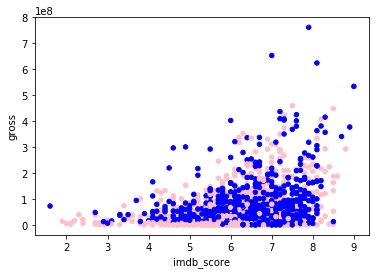

In [1044]:
color = {1: 'blue', 0: 'pink'}
imdb_scatter = imdb.plot.scatter(x='imdb_score', y='gross', c=[color.get(c) for c in imdb.Success])

In [1045]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 5042
Data columns (total 13 columns):
movie_title            1994 non-null object
title_year             1994 non-null float64
director_name          1994 non-null object
actor_1_name           1994 non-null object
imdb_score             1994 non-null float64
duration               1994 non-null float64
budget                 1994 non-null float64
gross                  1994 non-null float64
num_voted_users        1994 non-null int64
Revenue                1994 non-null float64
successful_actor       1994 non-null int64
successful_director    1994 non-null int64
Success                1994 non-null float64
dtypes: float64(7), int64(3), object(3)
memory usage: 218.1+ KB


In [1046]:
imdb.duplicated().head()

0    False
1    False
3    False
5    False
7    False
dtype: bool

In [1047]:
pd.value_counts(imdb['director_name'].values).head()

Clint Eastwood       12
Shawn Levy           11
Steven Soderbergh    10
Ridley Scott         10
Steven Spielberg      9
dtype: int64

In [1048]:
pd.value_counts(imdb['Success'].values)

0.0    1464
1.0     530
dtype: int64

In [1049]:
pd.value_counts(imdb['actor_1_name'].values).head()

J.K. Simmons      26
Robert De Niro    22
Johnny Depp       21
Matt Damon        21
Nicolas Cage      19
dtype: int64


## 4. Data analysis

We decided on using a decision tree  Quinlan, 1986) as the method for our analysis, as we assumed it to be the best way to identify the biggest contributing factors for a movie’s success, since classification will be paramount for this venture.  To best make use of it, we made sure to process the data  so that most columns had binary values, to more easily extinguish the most important factors, even if our method of doing so may have been to restrictive. Our biggest concern is that we’ve overfitted the data as we’ve defined  actors almost entirely on the sum totals of movies they have been on as recorded in the data set. However, we believe that this could easily be circumvented through the use of another data set to more accurately identify famous actors and hopefully directors as well. However, we are fairly certain that we’d need more data to accurately represent aspects such as writing, cultural influences, cast, editors and other key figures in the process of filmmaking. Of course, to simplify/speed up this process, we’ve made use of machine learning, so that the mass analysis of the data entries can be done quickly/efficiently.
Training set:
Test set:

The result was a decision tree with a success rate of 83% on the test set.
The important factors that the  decision tree goes through are: the sum total of the revenue of film’s that the actors and director have been a part of.


In [1050]:
success_data = imdb.Success 
imdb_tree = imdb[['Revenue', 'successful_actor', 'successful_director', 'imdb_score', 'num_voted_users']]
imdb_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 5042
Data columns (total 5 columns):
Revenue                1994 non-null float64
successful_actor       1994 non-null int64
successful_director    1994 non-null int64
imdb_score             1994 non-null float64
num_voted_users        1994 non-null int64
dtypes: float64(2), int64(3)
memory usage: 93.5 KB


We split our data into 75% training set and 25% test set. 

In [1051]:
X_train, X_test, y_train, y_test = train_test_split(imdb_tree, success_data, test_size=0.25)
print("Our training data has {} rows".format(len(X_train)))
print("Our test data has {} rows".format(len(X_test)))

Our training data has 1495 rows
Our test data has 499 rows


In [1052]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train.values, y_train.values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Bellow are the results of treined classifier.

In [1053]:
sample = X_test.head(5)
sample['Success'] = classifier.predict(sample)
sample

Revenue  successful_actor  successful_director  imdb_score  \
3410  -7431305.0                 0                    0         6.5   
1353 -15229136.0                 0                    0         5.5   
2005 -18302044.0                 0                    0         6.7   
154   -1476537.0                 1                    0         7.2   
191   19234747.0                 0                    1         6.7   

      num_voted_users  Success  
3410            16617      0.0  
1353             8433      0.0  
2005            64944      0.0  
154             64322      0.0  
191            114287      0.0

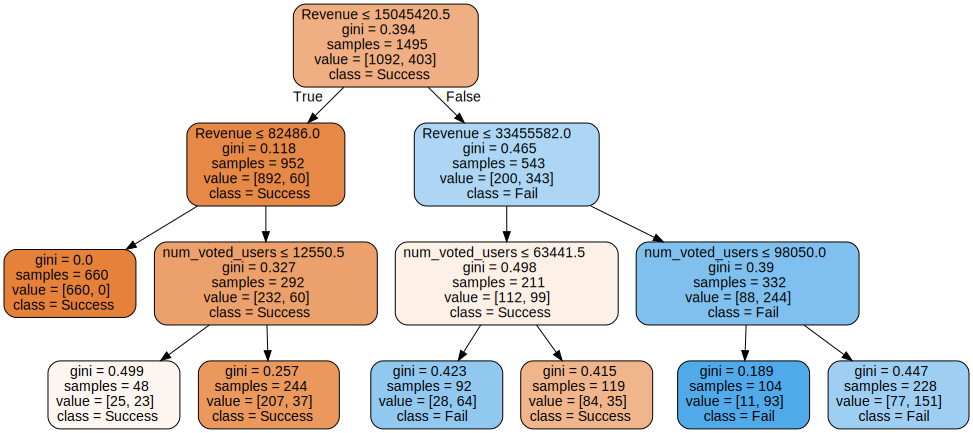

In [1054]:
tree_plot = Source(tree.export_graphviz(classifier, out_file=None, 
                            feature_names=X_train.columns, class_names=['Success', 'Fail'], 
                            filled=True, rounded=True, special_characters=True))
tree_plot

This is the accuracy rate from our classifier. 

In [1055]:
y_pred_en = classifier.predict(X_test)
y_pred_en

print("Accuracy is ", accuracy_score(y_test,y_pred_en))

Accuracy is  0.8336673346693386


## 5. Evaluation of results

Unfortunately, it’s likely far from the whole picture that we’ve been able to lay out.  Especially since some important factors haven’t been processed, such as the IP’s potential for transmedia growth, as in possibilities for merchandise, sequels, games, books,tv shows, spin-offs and other ways to extend the IP, but even beyond that, there are factors such as the editors, the special effects, and marketing that aren’t represented at all in the data set, which in turn limits the potential quality of an analysis.  And what factors we have been able to uncover might not be applicable on a larger scale, as it’s highly likely that the model has been overfitted, because of how the preprocessing classifies actors and directors. Ultimately, it was a fairly fruitless effort, as it’s highly likely that the key factors behind a movie’s success lies beyond the data used in this project, and that these factors are commonly seen as important anyhow, in which case no new knowledge has been gained.



## 6. Schedule and description of project plan

Below are the initial dates and progress to be achieved. 



<table align="left">
  <tr>
    <th style="text-align:left">Description</th>
    <th style="text-align:left">Approximate date</th>     
  </tr>
  <tr>
    <td style="text-align:left">Idea and problem formulation</td>
    <td>2018-11-14</td>     
  </tr>
  <tr>
    <td style="text-align:left">Data collection and preprocessing</td>
    <td>2018-11-16</td>     
  </tr>
   <tr>
    <td style="text-align:left">First draft (non-final)</td>
    <td>2018-11-16</td>     
  </tr>
     <tr>
    <td style="text-align:left">Second draft</td>
    <td>2018-11-23</td>     
  </tr>
     <tr>
    <td style="text-align:left">Finalised version</td>
    <td>2018-11-28</td>     
  </tr>   
</table>

## 7. Ethical aspects that need to be considered

As Boyd & Crawford (2012) state “just because it is accessible does not make it ethical”. This is a large debate point in using public data.  The fact that some data is publicly available does not always mean it is ethical to be used (Boyd & Crawford, 2012). 
From the ethical perspective we can state that data we have is aggregated data that can’t be linked to single user or group of users. On the other hand actors may be identifiable in our data, which is not relevant for our study. Thus we remove all the identifiable features of the actors/directors while measuring their experience in our analysis.

## References

Anders, C. J. (no date) How much money does a movie need to make to be profitable?, io9. Available at: https://io9.gizmodo.com/5747305/how-much-money-does-a-movie-need-to-make-to-be-profitable (Accessed: 27 November 2018).

Boyd, d., & Crawford, K. (2012). Critical Questions for Big Data. Information, Communication & Society, 15(5), 662–679. https://doi.org/10.1080/1369118X.2012.678878

Hsu, P., Shen, Y. and Xie, X. (2014). Predicting Movies User Ratings with Imdb Attributes. https://link.springer.com/chapter/10.1007%2F978-3-319-11740-9_41 [Accessed: 2018-11-15]

IMDb. 2018. [Online] available at: www.imdb.com [Accessed: 2018-11-15]

IMDb. 2018. Press Room - IMDb. [Online] Available at: https://www.imdb.com/pressroom/about/. [Accessed 2018-11-15].

Quinlan J. R. (1986) ‘Induction of Decision Trees’. Available at: https://dl.acm.org/citation.cfm?id=637969 [Accessed: 27 November 2018].

Sklearn.metric SciKitLearn(2018), available at  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html [Accessed 2018-11-27] 
